## Лабораторная Работа номер 1:  Приближённое  решение уравнения вида f(x) = 0 методом половинного деления.
### Вариант 19: 2*sin(x + 0.5) = 1.5 - x


<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DxDyBoss\AppData\Local\Temp\ipykernel_12364\1223011937.py:27: SyntaxWarning: invalid escape sequence '\d'
  plt.title('График функции $f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$')


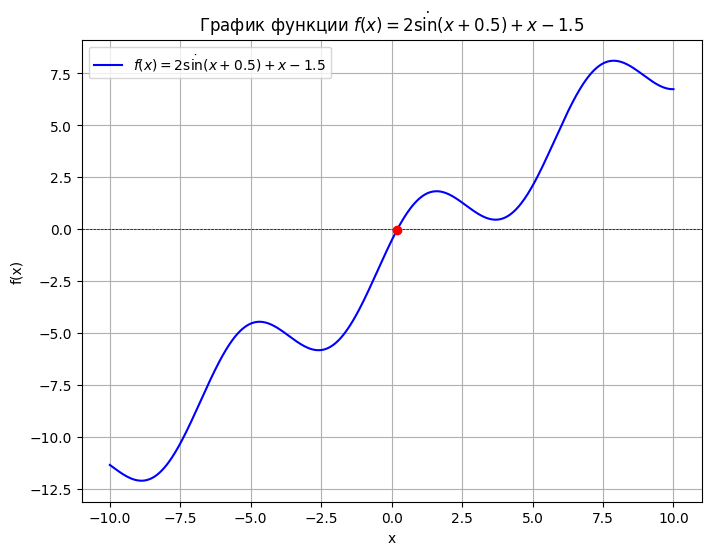

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию
def f(x):
    return 2 * np.sin(x + 0.5) + x - 1.5

# Создаем массив значений x
x = np.linspace(-10, 10, 500)

# Вычисляем значения функции
y = f(x)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$', color='blue')

# Добавляем горизонтальную линию y=0 для наглядности
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Находим приближенные точки пересечения с осью x
zero_crossings = np.where(np.diff(np.sign(y)))[0]
for crossing in zero_crossings:
    plt.plot(x[crossing], y[crossing], 'ro')  # Отмечаем точки пересечения красными точками

# Добавляем легенду, сетку и заголовок
plt.title('График функции $f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

In [22]:
import numpy as np

# Определяем функцию
def f(x):
    return 2 * np.sin(x + 0.5) + x - 1.5

# Метод половинного деления с выводом отчета
def bisection_method(a, b, tol):
    """
    Находит корень уравнения f(x) = 0 методом половинного деления.

    :param a: Левая граница интервала
    :param b: Правая граница интервала
    :param tol: Точность
    :return: Приближенное значение корня
    """
    if f(a) * f(b) >= 0:
        raise ValueError("Функция должна менять знак на интервале [a, b].")

    # Определяем количество знаков после запятой для форматирования
    precision_digits = abs(int(np.floor(np.log10(tol))))

    print(f"{'Итерация':<10}{'a':<15}{'b':<15}{'c':<15}{'f(c)':<15}")
    print("-" * 65)

    iteration = 0
    while (b - a) / 2 > tol:
        c = (a + b) / 2  # Находим середину интервала
        f_c = f(c)

        # Выводим отчет по текущей итерации
        print(f"{iteration:<10}{a:<15.{precision_digits}f}{b:<15.{precision_digits}f}{c:<15.{precision_digits}f}{f_c:<15.{precision_digits}f}")

        if f_c == 0:  # Если f(c) = 0, то c — точный корень
            return c
        elif f(a) * f_c < 0:  # Корень находится в левой половине
            b = c
        else:  # Корень находится в правой половине
            a = c

        iteration += 1

    root = (a + b) / 2
    print(f"\nКорень найден: {root:.{precision_digits}f}")
    return root

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = bisection_method(a, b, tol)
except ValueError as e:
    print(f"Ошибка: {e}")

Итерация  a              b              c              f(c)           
-----------------------------------------------------------------
0         0.0            2.0            1.0            1.5            
1         0.0            1.0            0.5            0.7            
2         0.0            0.5            0.2            0.1            
3         0.0            0.2            0.1            -0.2           

Корень найден: 0.2
